In [1]:
import pandas as pd
from Resources.config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets


In [2]:
private = Path("output/school_summary.csv")

private_df = pd.read_csv(private)
private_df = private_df[private_df["Institution Type"] == "Private nonprofit"].reset_index()
private_df.columns

Index(['level_0', 'Unnamed: 0', 'index', 'School Name', 'School City',
       'Institution Type', 'Total Students', '% Male Students',
       '% Female Students', '% Caucasian Student',
       '% African American Student', '% Hispanic Student', '% Asian Student',
       '% American Indian and Alaska Native Student',
       '% Native Hawaiian and Pacific Islander Student',
       '% Two or More Race Student', '% Non Resident Alien Student',
       '% Unknown Student', 'Retention Rate',
       'Share of Student Received Pell Grant', 'Overall Completion Rate',
       'Completion rate of Caucasian Student',
       'Completion rate of African American Student',
       'Completion rate of Hispanic Student',
       'Completion rate of Asian Student',
       'Completion rate of American Indian/Alaska Native Student',
       'Completion rate of Two or More Races Student',
       'Completion rate of Non Tesident Alien Student'],
      dtype='object')

0    0.6516
1    0.5807
2    0.6621
3    0.7423
4    0.8502
5    0.6490
6    0.8969
7    0.7810
8    0.5941
9    0.7840
Name: Overall Completion Rate, dtype: float64


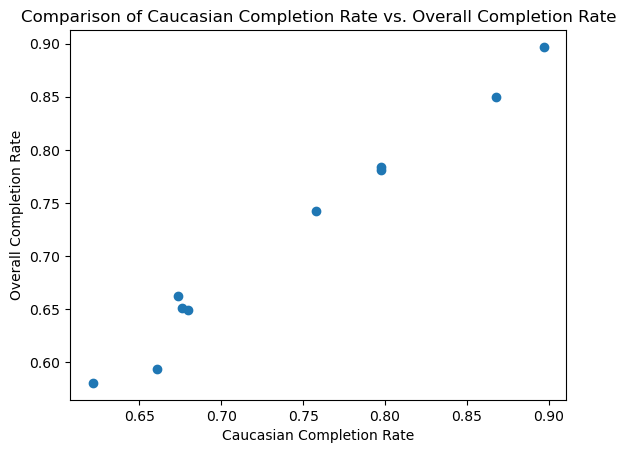

In [3]:
caucasian_completion_rates = private_df['Completion rate of Caucasian Student']
overall_completion_rates = private_df['Overall Completion Rate']

print(private_df["Overall Completion Rate"])
# Create a scatter plot
plt.scatter(caucasian_completion_rates, overall_completion_rates)

# Set labels and title
plt.xlabel('Caucasian Completion Rate')
plt.ylabel('Overall Completion Rate')
plt.title('Comparison of Caucasian Completion Rate vs. Overall Completion Rate')

# Show the plot
plt.show()

# make this plot with added ethnicites! place your x axis as the overall and y axis as compleationrate of various ethnicities
# but wait what does overall compleation rate mean? is that not a single point? Nope its the compleation rate of each school, should I avg it?

Completion rate of Caucasian Student                        0.74281
Completion rate of African American Student                 0.54975
Completion rate of Hispanic Student                         0.67781
Completion rate of Asian Student                            0.66415
Completion rate of American Indian/Alaska Native Student    0.46333
Completion rate of Two or More Races Student                0.65780
Completion rate of Non Tesident Alien Student               0.68329
dtype: float64


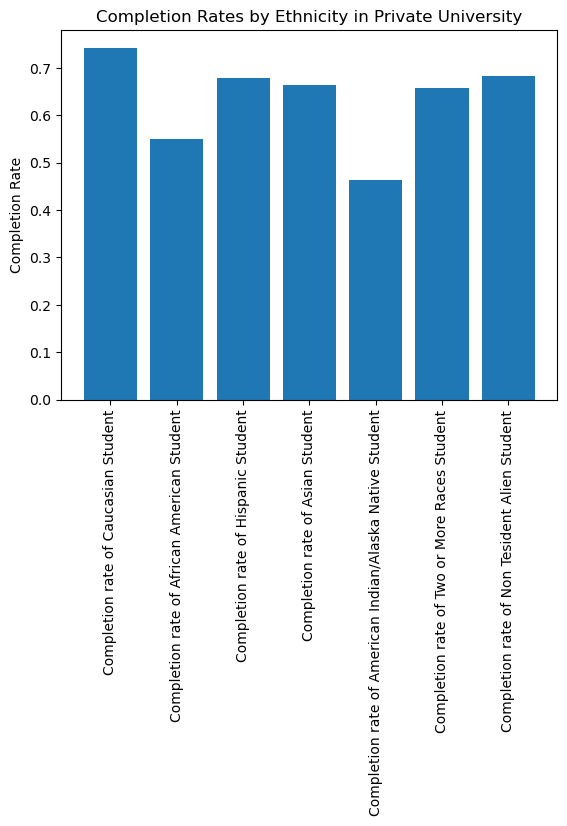

In [4]:
ethnic_completion_rate = private_df[
    ['Completion rate of Caucasian Student',
       'Completion rate of African American Student',
       'Completion rate of Hispanic Student',
       'Completion rate of Asian Student',
       'Completion rate of American Indian/Alaska Native Student',
       'Completion rate of Two or More Races Student',
       'Completion rate of Non Tesident Alien Student']]

average_completion_rates = ethnic_completion_rate.mean()
print(average_completion_rates)

ethnicities = average_completion_rates.index


plt.bar(ethnicities, average_completion_rates) 
plt.ylabel("Completion Rate")
plt.title("Completion Rates by Ethnicity in Private University")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Individual Private University Completion rate')

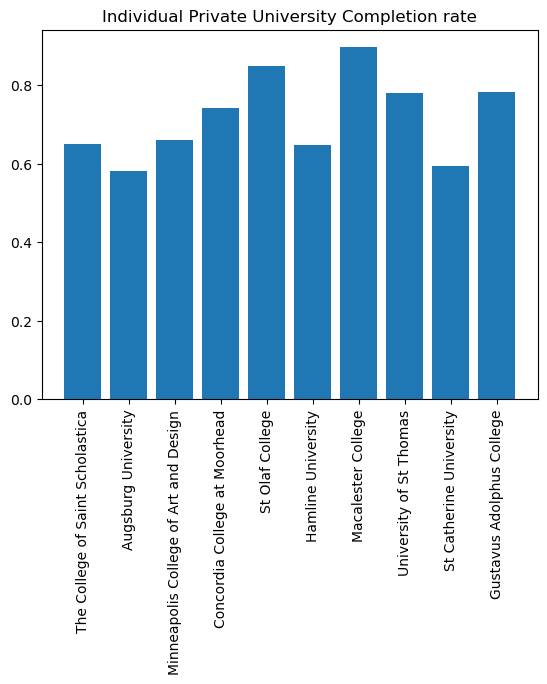

In [5]:
school_completion_rate = private_df["Overall Completion Rate"]
school = private_df["School Name"]
plt.bar(school, school_completion_rate)
plt.xticks(rotation=90)
plt.title("Individual Private University Completion rate")
